In [1]:
using DrWatson
using Plots
@quickactivate :Catalyst

path="simulation/nonlinear_micro_problem/calibration"
input_exp=Float64[]
output_exp=Float64[]

for row in CSV.File(datadir("experiment/SBA15_interp_10.csv"); delim=",")
    push!(input_exp, row.I)
    push!(output_exp, row.O)
end

Dᵢ=0.177847; kᵧ=1.; kᵧnew=29.940; k=0.992722*1e-1; microcomp_type=:nonlinear; Q=36.036; kₙ=1.17992
d = (Dᵢ=Dᵢ, kᵧnew=kᵧnew, k=k,microcomp_type=microcomp_type, Q=Q, kₙ=kₙ)
save = DrWatson.savename(d, digits=6)

#cd(datadir(path))
#mkdir(save)
#mkdir("$save/paraview")
#mkdir("$save/fields")
#mkdir("$save/fields/c")
#mkdir("$save/fields/R")
#mkdir("$save/fields/cPsim")

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273
┌ Info: Precompiling Catalyst [01e5440a-74e3-4b45-b8b9-c13ddfc5051b]
└ @ Base loading.jl:1273


"Dᵢ=0.177847_Q=36.036_k=0.099272_kᵧnew=29.94_kₙ=1.17992_microcomp_type=nonlinear"

In [2]:
n = 2
nels = (5n, convert(Int,2.5n),n)
S = Vec((0.0,0.0,0.0))
E = Vec((1.0,0.5,0.2))
grid = generate_grid(Tetrahedron, nels, S, E)
faces = union(getfaceset(grid,"top"),getfaceset(grid,"bottom"),getfaceset(grid,"left"),getfaceset(grid,"right"),
                getfaceset(grid,"front"),getfaceset(grid,"back"))
addfaceset!(grid, "1", faces)

Grid{3,Cell{3,4,4},Float64} with 600 Tetrahedron cells and 198 nodes

In [21]:
c, R = Catalyst.solve(Dᵢ, k, kᵧ, kᵧnew, input_exp, output_exp, microsave=false,
                      microsave_time=1:1000, microsave_path=datadir("$path/$save/paraview"),
                      microcomp_type=:nonlinear, Q=Q, kₙ=kₙ,micromesh=grid);

#Catalyst.save_all(c, R, save, datadir("$path/$save/fields"))

macro-scale progress...100%|████████████████████████████| Time: 0:17:16


Creating a gif...100%|██████████████████████████████████| Time: 0:00:43
┌ Info: Saved animation to 
│   fn = /home/mkoehler/Repos/advection-diffusion-catalysis/data/simulation/nonlinear_micro_problem/calibration/nonlinear-micro-kgammanew-reaction.gif
└ @ Plots /home/mkoehler/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/mkoehler/Repos/advection-diffusion-catalysis/data/simulation/nonlinear_micro_problem/calibration/nonlinear-micro-kgammanew-reaction.gif")
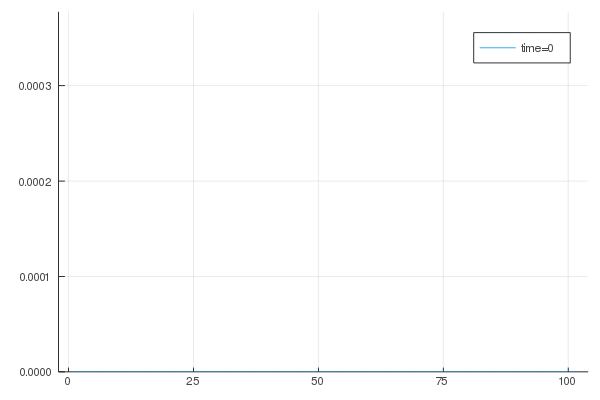

In [22]:
maxR = maximum(maximum.(R))
maxR *= 1.1

Catalyst.plotAnimation(R, "nonlinear-micro-kgammanew-reaction.gif", (0, maxR))

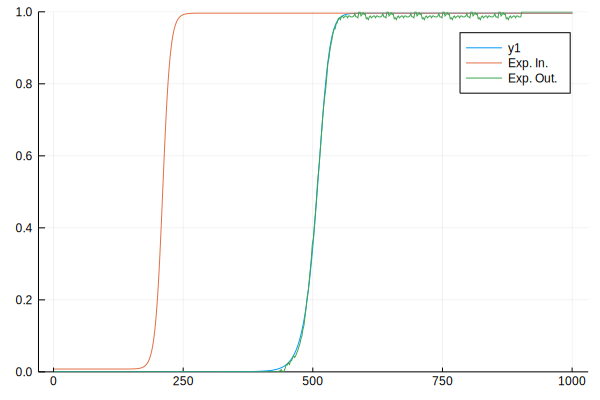

In [23]:
Catalyst.plotOverTime(c)
plot!(input_exp, label="Exp. In.")
plot!(output_exp, label="Exp. Out.")

In [4]:
Dᵢ=0.177847; kᵧ=1.; kᵧnew=29.940; k=0.992722*1e-1; microcomp_type=:nonlinear; Q=1.;kₙ=30.
c2, R2 = Catalyst.solve(Dᵢ, k, kᵧ, kᵧnew, input_exp, output_exp, microsave=false,
                      microsave_time=1:1000, microsave_path=datadir("$path/$save/paraview"),
                      microcomp_type=:nonlinear, Q=Q, kₙ=kₙ,micromesh=grid);

macro-scale progress...100%|████████████████████████████| Time: 0:12:13


Creating a gif...100%|██████████████████████████████████| Time: 0:00:44
┌ Info: Saved animation to 
│   fn = /home/mkoehler/Repos/advection-diffusion-catalysis/notebooks/nonlinear-micro-kgammanew-reaction.gif
└ @ Plots /home/mkoehler/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/mkoehler/Repos/advection-diffusion-catalysis/notebooks/nonlinear-micro-kgammanew-reaction.gif")
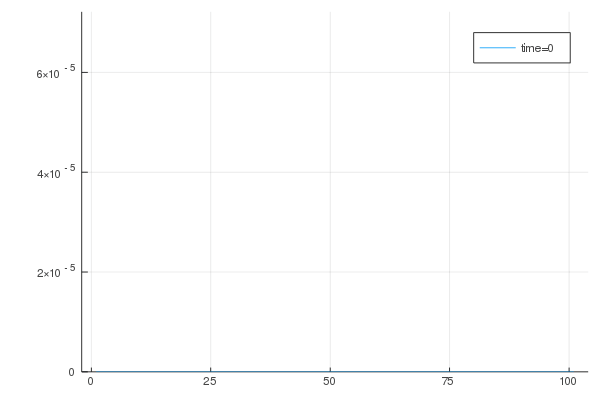

In [5]:
maxR = maximum(maximum.(R2))
maxR *= 1.1

Catalyst.plotAnimation(R2, "nonlinear-micro-kgammanew-reaction.gif", (0, maxR))

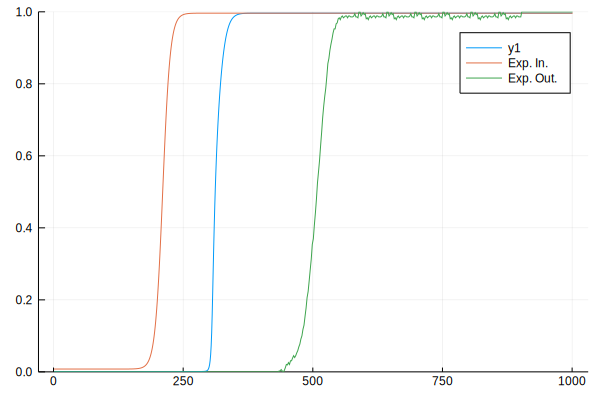

In [6]:
Catalyst.plotOverTime(c2)
plot!(input_exp, label="Exp. In.")
plot!(output_exp, label="Exp. Out.")

In [7]:
Dᵢ=0.177847; kᵧ=1.; kᵧnew=29.940; k=0.992722*1e-1; microcomp_type=:nonlinear; Q=1.; kₙ=1.
c3, R3 = Catalyst.solve(Dᵢ, k, kᵧ, kᵧnew, input_exp, output_exp, microsave=false,
                      microsave_time=1:1000, microsave_path=datadir("$path/$save/paraview"),
                      microcomp_type=:nonlinear, Q=Q, kₙ=kₙ,micromesh=grid);

macro-scale progress...100%|████████████████████████████| Time: 0:13:20


Creating a gif...100%|██████████████████████████████████| Time: 0:00:27
┌ Info: Saved animation to 
│   fn = /home/mkoehler/Repos/advection-diffusion-catalysis/notebooks/nonlinear-micro-kgammanew-reaction.gif
└ @ Plots /home/mkoehler/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/mkoehler/Repos/advection-diffusion-catalysis/notebooks/nonlinear-micro-kgammanew-reaction.gif")
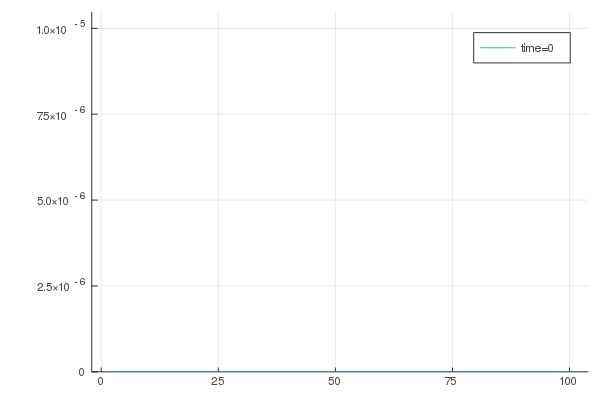

In [8]:
maxR = maximum(maximum.(R3))
maxR *= 1.1

Catalyst.plotAnimation(R3, "nonlinear-micro-kgammanew-reaction.gif", (0, maxR))

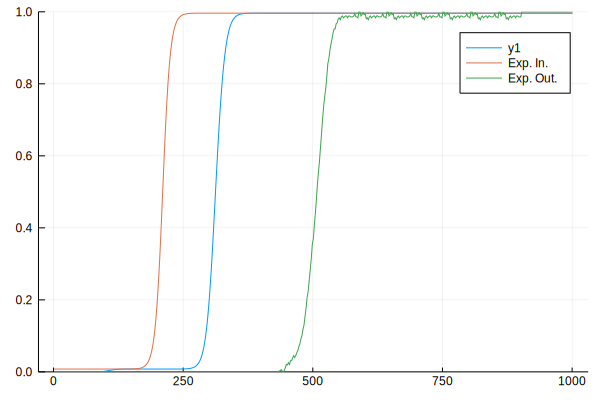

In [9]:
Catalyst.plotOverTime(c3)
plot!(input_exp, label="Exp. In.")
plot!(output_exp, label="Exp. Out.")